In [1]:
# Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [2]:
# Find url for the api key. I'm not sure how to get an API for a spreadsheet, I'll have to figure this out later
#filepath = ("C:\Users\chero\Downloads\RGI2000-v7.0-G-01_alaska-attributes.csv")

# Set up a new name for the spreadsheet that is quick and easy, and make sure you note the header location
alaska_sheet = pd.read_csv(r"C:\Users\chero\Downloads\RGI2000-v7.0-G-01_alaska-attributes.csv", header = 0)

# print(alaska_sheet.head())
alaska_sheet

,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m
0,RGI2000-v7.0-G-01-00001,1,01-01,G204091E67414N,392889,624,2008-09-02T00:00:00,-155.909404,67.413726,5,...,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,COPDEM30,725
1,RGI2000-v7.0-G-01-00002,1,01-01,G204121E67419N,392890,624,2008-09-02T00:00:00,-155.879114,67.419232,5,...,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,COPDEM30,484
2,RGI2000-v7.0-G-01-00003,1,01-01,G204471E67431N,392897,624,2008-09-02T00:00:00,-155.530786,67.431484,5,...,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,COPDEM30,1099
3,RGI2000-v7.0-G-01-00004,1,01-01,G204497E67431N,392899,624,2008-09-02T00:00:00,-155.501948,67.430514,5,...,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,COPDEM30,652
4,RGI2000-v7.0-G-01-00005,1,01-01,G204521E67429N,392901,624,2008-09-02T00:00:00,-155.478173,67.432873,5,...,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,COPDEM30,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,RGI2000-v7.0-G-01-27505,1,01-06,G232055E58382N,419220,624,2005-08-15T00:00:00,-127.943494,58.381563,9,...,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,COPDEM30,757
27505,RGI2000-v7.0-G-01-27506,1,01-06,G232006E58375N,419219,624,2005-08-15T00:00:00,-127.994907,58.374932,9,...,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,COPDEM30,915
27506,RGI2000-v7.0-G-01-27507,1,01-06,G231997E58381N,419218,624,2005-08-15T00:00:00,-128.003487,58.380406,9,...,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,COPDEM30,714
27507,RGI2000-v7.0-G-01-27508,1,01-06,G231855E58382N,419215,624,2005-08-15T00:00:00,-128.146532,58.381816,9,...,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,COPDEM30,489


In [3]:
alaska_sheet_mod1 = alaska_sheet.select_dtypes(exclude = ['object'])
alaska_sheet_mod2 = alaska_sheet_mod1[['subm_id', 'area_km2', 'zmin_m', 'zmax_m', 'zmed_m', 'zmean_m', 'slope_deg', 'aspect_deg']]
print(alaska_sheet_mod2.head())
# Get column headers
# These bulk compositions are used for perple_x modelling in hp62ver.dat files, so bulk compositions were recalculated to include FeO and Fe2O3 by repartitioning all iron into FeO and assuming that ~3% of the total FeO content was Fe2O3 (Smye, 2014)

cols = alaska_sheet_mod2.columns.tolist()

# indexing by the rock id#/code
idx = cols.index('subm_id')

# Get the names of all columns after rock name
alaska_cols = cols[idx + 1:]

print(alaska_cols)

   subm_id  area_km2     zmin_m     zmax_m     zmed_m    zmean_m  slope_deg  \
0      624  0.239199  1485.3176  1693.6235  1544.6694  1553.9403  17.606613   
1      624  0.104641  1278.4006  1394.7657  1328.5566  1330.9150  19.846369   
2      624  0.216605  1294.7034  1704.7420  1423.2068  1437.2352  23.690063   
3      624  0.252649  1224.1788  1286.8977  1249.6306  1249.0662  12.782562   
4      624  0.474716  1052.4401  1488.1299  1290.8923  1273.7834  17.148510   

   aspect_deg  
0  342.330469  
1  345.367012  
2   13.467490  
3   42.854332  
4  299.058193  
['area_km2', 'zmin_m', 'zmax_m', 'zmed_m', 'zmean_m', 'slope_deg', 'aspect_deg']


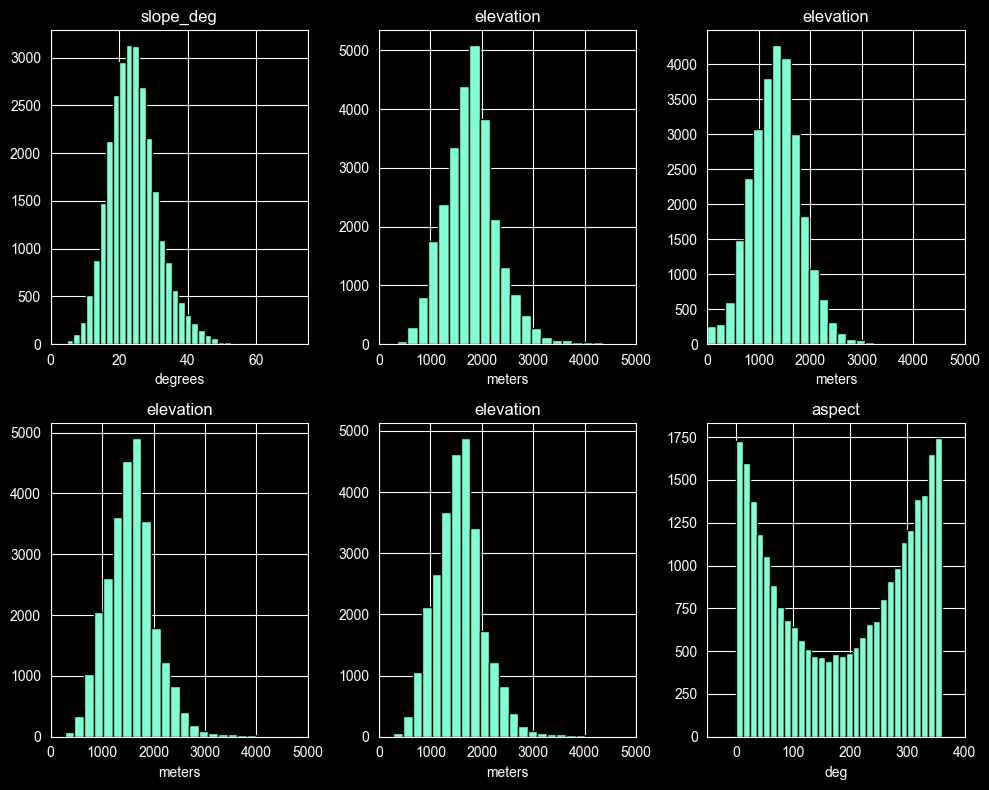

In [20]:
# Variation of Values
fig, axes = plt.subplots(2, 3, figsize=(10, 8))  # 2 rows, 2 columns

# Generating multipaneled plot of histograms showing distribution of values
axes[0, 0].hist(alaska_sheet_mod2['slope_deg'], bins=30, color='aquamarine', edgecolor='black')
axes[0, 0].set_xlim([0, 75])
axes[0, 0].set_title('slope_deg')
axes[0, 0].set_xlabel('degrees')

axes[0, 1].hist(alaska_sheet_mod2['zmax_m'], bins=30, color='aquamarine', edgecolor='black')
axes[0, 1].set_xlim([0, 5000])
axes[0, 1].set_title('elevation')
axes[0, 1].set_xlabel('meters')

axes[0, 2].hist(alaska_sheet_mod2['zmin_m'], bins=30, color='aquamarine', edgecolor='black')
axes[0, 2].set_xlim([0, 5000])
axes[0, 2].set_title('elevation')
axes[0, 2].set_xlabel('meters')

axes[1, 0].hist(alaska_sheet_mod2['zmed_m'], bins=30, color='aquamarine', edgecolor='black')
axes[1, 0].set_xlim([0, 5000])
axes[1, 0].set_title('elevation')
axes[1, 0].set_xlabel('meters')

axes[1, 1].hist(alaska_sheet_mod2['zmean_m'], bins=30, color='aquamarine', edgecolor='black')
axes[1, 1].set_xlim([0, 5000])
axes[1, 1].set_title('elevation')
axes[1, 1].set_xlabel('meters')

axes[1, 2].hist(alaska_sheet_mod2['aspect_deg'], bins=30, color='aquamarine', edgecolor='black')
axes[1, 2].set_xlim([-50, 400])
axes[1, 2].set_title('aspect')
axes[1, 2].set_xlabel('deg')

plt.tight_layout()

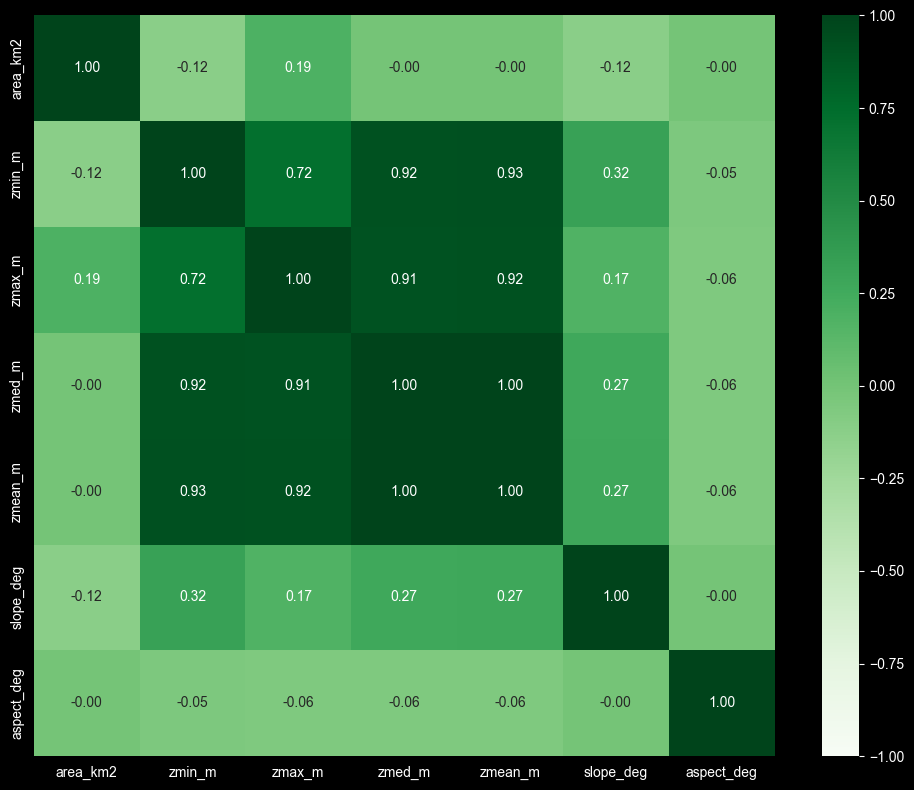

In [22]:
# Correlation coefficient matrix

df_ice = alaska_sheet_mod2[alaska_cols]
corr_matrix = df_ice.corr()

#Latex labels
#latex_cols = [latex_labels[col] for col in geochem_cols]

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap= 'Greens',
            vmin = -1, vmax = 1, center = 0, ax=ax, square = True,
            xticklabels = alaska_cols, yticklabels = alaska_cols)

plt.tight_layout()
plt.show()

In [23]:
ice = alaska_sheet_mod2[alaska_cols].dropna()
ice_centered = ice - ice.mean()


In [24]:
U, S, Vt = np.linalg.svd(ice_centered, full_matrices = False)

pca_result = U * S

explained_variance = (S ** 2) / (len(ice_centered) - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

print("Explained Variance")
for i, var in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")


Explained Variance
  PC1: 0.9059 (90.59%)
  PC2: 0.0737 (7.37%)
  PC3: 0.0142 (1.42%)
  PC4: 0.0048 (0.48%)
  PC5: 0.0012 (0.12%)
  PC6: 0.0001 (0.01%)
  PC7: 0.0000 (0.00%)


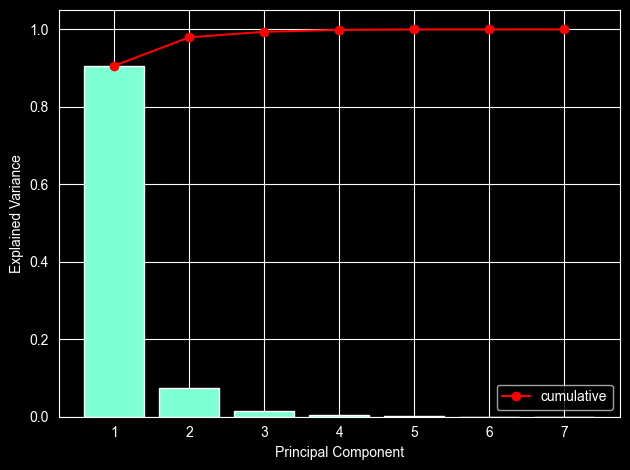

In [25]:
fig, ax = plt.subplots()
ax.bar(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, color = 'aquamarine')
ax.plot(range(1, len(explained_variance_ratio)+1), np.cumsum(explained_variance_ratio), 'ro-', label = 'cumulative')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_xticks(range(1, len(explained_variance_ratio)+1))
ax.legend()
ax.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

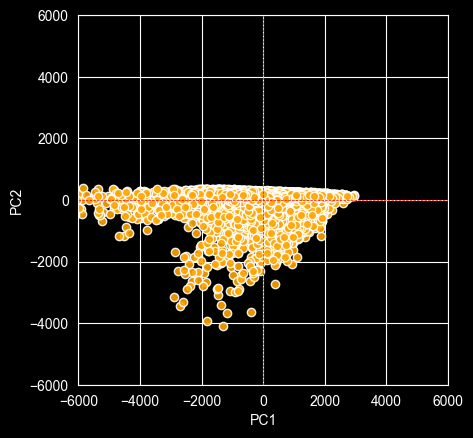

In [26]:
pca_result[:, 0] *= -1
pca_result[:, 1] *= -1

fig, ax = plt.subplots()
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.9, color='orange', edgecolors='w')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.axhline(y=0, color='r', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='r', linestyle='--', linewidth=0.5)
ax.set_xlim(-6000, 6000)
ax.set_ylim(-6000, 6000)
ax.set_aspect('equal')
ax.grid(True)
ax.set_axisbelow(True)

plt.show()

In [27]:
loadings = pd.DataFrame(Vt.T, index=alaska_cols, columns=[f'PC{i+1}' for i in range(len(alaska_cols))])
print("\nLoadings for PC1 and PC2:")
print(loadings[['PC1', 'PC2']])


Loadings for PC1 and PC2:
                 PC1       PC2
area_km2    0.001084  0.063377
zmin_m      0.470134 -0.692021
zmax_m      0.527180  0.715324
zmed_m      0.500667 -0.049649
zmean_m     0.500324 -0.053915
slope_deg   0.001944 -0.005220
aspect_deg -0.007646 -0.001558


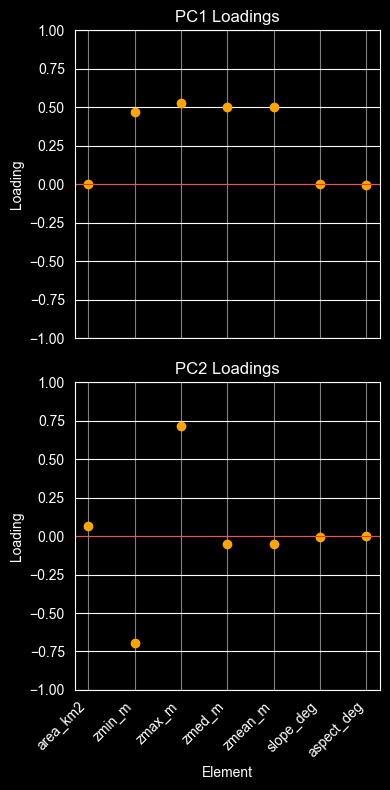

In [30]:
# Why don't we visualize these loadings?
fig, axes = plt.subplots(2, 1, figsize=(4, 8), sharex=True)
x = np.arange(len(alaska_cols))
# latex_cols = [latex_labels[col] for col in geochem_cols]

# PC1 loadings
ax1 = axes[0]
ax1.scatter(x, loadings['PC1'], color='orange')
ax1.set_ylabel('Loading')
ax1.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax1.set_ylim(-1, 1)
ax1.grid(True, axis='x', color = 'grey')
ax1.set_axisbelow(True)
ax1.set_title('PC1 Loadings')

# PC2 loadings
ax2 = axes[1]
ax2.scatter(x, loadings['PC2'], color='orange')
ax2.set_ylabel('Loading')
ax2.set_xlabel('Element')
ax2.set_xticks(x)
ax2.set_xticklabels(alaska_cols, rotation=45, ha='right')
ax2.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
ax2.set_ylim(-1, 1)
ax2.grid(True, axis='x', color ='grey')
ax2.set_axisbelow(True)
ax2.set_title('PC2 Loadings')

plt.tight_layout()
plt.show()
